In [1]:
from histimator.models import HistiModel, HistiChannel, HistiSample
from histimator.estimator import BinnedLH

In [2]:
from iminuit import Minuit, describe
import numpy as np
%matplotlib inline

## Testing multiple Regions

In [3]:
hist_1 = np.asarray([1,2,3,4])
hist_2 = np.asarray([5,5,5,5])
hist_3 = np.asarray([3,4,5,4])
bins_1 = np.asarray([0,1,2,3,4])
bins_2 = np.asarray([0,1,2])
bins_3 = np.asarray([0,1,2,3,4,5,6,7,8])

In [4]:
m = HistiModel('model')
signal_1 = HistiSample('signal')
signal_1.SetHisto((hist_1,bins_1))
signal_1.AddNorm("SigXSecOverSM",1.0,0,3)
background_1 = HistiSample('background1')
background_1.SetHisto((hist_2,bins_1))
background_1.AddOverallSys("BackgroundNormSyst1",0.9,1.1)
background_2 = HistiSample('background1')
background_2.SetHisto((hist_3,bins_1))
background_2.AddOverallSys("BackgroundNormSyst2",0.7,1.3)

In [5]:
chan1 = HistiChannel("SR")
chan1.AddSample(signal_1)
chan1.AddSample(background_1)
chan1.AddSample(background_2)

In [6]:
data1 = hist_1*2 +hist_2 +hist_3

chan1.SetData(data1)
m.AddChannel(chan1)

In [7]:
blh = BinnedLH(m)
params = m.Parameters()
minimiser = Minuit(blh, **params)
minimiser.migrad()

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter SigXSecOverSM is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter BackgroundNormSyst1 is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter BackgroundNormSyst2 is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until


FCN = 7.93732484433 
 TOTAL NCALL = 95 
 NCALLS = 95 
 
 
 EDM = 5.3386702711e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,2.00311,2.47188,0,0,0.0,3.0,
2,BackgroundNormSyst1,-0.0359671,7.30277,0,0,-5.0,5.0,
3,BackgroundNormSyst2,0.0284018,5.36047,0,0,-5.0,5.0,


({'hesse_failed': False, 'has_reached_call_limit': False, 'has_accurate_covar': True, 'has_posdef_covar': True, 'up': 1.0, 'edm': 5.3386702710972494e-05, 'is_valid': True, 'is_above_max_edm': False, 'has_covariance': True, 'has_made_posdef_covar': False, 'has_valid_parameters': True, 'fval': 7.937324844327186, 'nfcn': 95},
 [{'is_const': False, 'name': 'SigXSecOverSM', 'has_limits': True, 'value': 2.0031054164849587, 'number': 0, 'has_lower_limit': True, 'upper_limit': 3.0, 'lower_limit': 0.0, 'has_upper_limit': True, 'error': 2.471884506157002, 'is_fixed': False},
  {'is_const': False, 'name': 'BackgroundNormSyst1', 'has_limits': True, 'value': -0.0359671296626729, 'number': 1, 'has_lower_limit': True, 'upper_limit': 5.0, 'lower_limit': -5.0, 'has_upper_limit': True, 'error': 7.302770702665556, 'is_fixed': False},
  {'is_const': False, 'name': 'BackgroundNormSyst2', 'has_limits': True, 'value': 0.028401822425260903, 'number': 2, 'has_lower_limit': True, 'upper_limit': 5.0, 'lower_limi

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/iminuit/_plotting.py:51: RuntimeWarning: band and text is requested but the bound is too narrow.
  warnings.warn(RuntimeWarning('band and text is requested but'


(array([-2.9406636 , -2.84078947, -2.74091535, -2.64104123, -2.54116711,
        -2.44129299, -2.34141887, -2.24154475, -2.14167062, -2.0417965 ,
        -1.94192238, -1.84204826, -1.74217414, -1.64230002, -1.5424259 ,
        -1.44255177, -1.34267765, -1.24280353, -1.14292941, -1.04305529,
        -0.94318117, -0.84330705, -0.74343292, -0.6435588 , -0.54368468,
        -0.44381056, -0.34393644, -0.24406232, -0.14418819, -0.04431407,
         0.05556005,  0.15543417,  0.25530829,  0.35518241,  0.45505653,
         0.55493066,  0.65480478,  0.7546789 ,  0.85455302,  0.95442714,
         1.05430126,  1.15417538,  1.25404951,  1.35392363,  1.45379775,
         1.55367187,  1.65354599,  1.75342011,  1.85329423,  1.95316836,
         2.05304248,  2.1529166 ,  2.25279072,  2.35266484,  2.45253896,
         2.55241308,  2.65228721,  2.75216133,  2.85203545,  2.95190957,
         3.05178369,  3.15165781,  3.25153193,  3.35140606,  3.45128018,
         3.5511543 ,  3.65102842,  3.75090254,  3.8

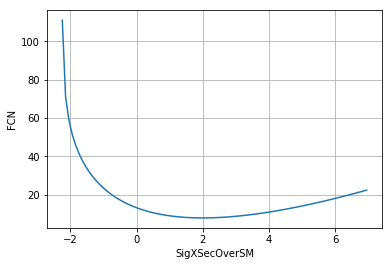

In [8]:
minimiser.draw_profile('SigXSecOverSM')

In [9]:
signal_1 = HistiSample('signal')
signal_1.SetHisto((hist_1[:2],bins_2))
signal_1.AddNorm("SigXSecOverSM",1.0,0,3)
background_1 = HistiSample('background1')
background_1.SetHisto((hist_2[:2],bins_2))
background_1.AddOverallSys("BackgroundNormSyst1",0.9,1.1)
background_2 = HistiSample('background1')
background_2.SetHisto((hist_3[:2],bins_2))
background_2.AddOverallSys("BackgroundNormSyst3",0.7,1.3)

In [10]:
chan2 = HistiChannel("CR1")
chan2.AddSample(signal_1)
chan2.AddSample(background_1)
chan2.AddSample(background_2)

In [11]:
data2 = hist_1[:2]*2 +hist_2[:2] +hist_3[:2]

chan2.SetData(data2)
m.AddChannel(chan2)

In [12]:
blh = BinnedLH(m)
params = m.Parameters()
minimiser = Minuit(blh, **params)

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter SigXSecOverSM is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter BackgroundNormSyst1 is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter BackgroundNormSyst2 is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter BackgroundNormSyst3 is floating but does not have initial step size. Assume 1.
  This is se

In [13]:
minimiser.migrad()

FCN = 12.2252181681 
 TOTAL NCALL = 57 
 NCALLS = 57 
 
 
 EDM = 2.9149004473e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,1.90589,0.864388,0,0,0.0,3.0,
2,BackgroundNormSyst1,-1.02167,3.79325,0,0,-5.0,5.0,
3,BackgroundNormSyst2,0.642053,1.7158,0,0,-5.0,5.0,
4,BackgroundNormSyst3,0.6,7.70479,0,0,-5.0,5.0,


({'hesse_failed': True, 'has_reached_call_limit': False, 'has_accurate_covar': False, 'has_posdef_covar': False, 'up': 1.0, 'edm': 2.9149004472952785e-05, 'is_valid': False, 'is_above_max_edm': False, 'has_covariance': True, 'has_made_posdef_covar': False, 'has_valid_parameters': True, 'fval': 12.225218168082748, 'nfcn': 57},
 [{'is_const': False, 'name': 'SigXSecOverSM', 'has_limits': True, 'value': 1.9058943451288708, 'number': 0, 'has_lower_limit': True, 'upper_limit': 3.0, 'lower_limit': 0.0, 'has_upper_limit': True, 'error': 0.8643877292555302, 'is_fixed': False},
  {'is_const': False, 'name': 'BackgroundNormSyst1', 'has_limits': True, 'value': -1.0216721581667345, 'number': 1, 'has_lower_limit': True, 'upper_limit': 5.0, 'lower_limit': -5.0, 'has_upper_limit': True, 'error': 3.793253034677338, 'is_fixed': False},
  {'is_const': False, 'name': 'BackgroundNormSyst2', 'has_limits': True, 'value': 0.6420534227412267, 'number': 2, 'has_lower_limit': True, 'upper_limit': 5.0, 'lower_li

(array([ 0.17711889,  0.21204364,  0.2469684 ,  0.28189316,  0.31681791,
         0.35174267,  0.38666743,  0.42159218,  0.45651694,  0.4914417 ,
         0.52636645,  0.56129121,  0.59621597,  0.63114072,  0.66606548,
         0.70099024,  0.73591499,  0.77083975,  0.80576451,  0.84068926,
         0.87561402,  0.91053878,  0.94546353,  0.98038829,  1.01531305,
         1.05023781,  1.08516256,  1.12008732,  1.15501208,  1.18993683,
         1.22486159,  1.25978635,  1.2947111 ,  1.32963586,  1.36456062,
         1.39948537,  1.43441013,  1.46933489,  1.50425964,  1.5391844 ,
         1.57410916,  1.60903391,  1.64395867,  1.67888343,  1.71380818,
         1.74873294,  1.7836577 ,  1.81858245,  1.85350721,  1.88843197,
         1.92335672,  1.95828148,  1.99320624,  2.02813099,  2.06305575,
         2.09798051,  2.13290526,  2.16783002,  2.20275478,  2.23767953,
         2.27260429,  2.30752905,  2.3424538 ,  2.37737856,  2.41230332,
         2.44722807,  2.48215283,  2.51707759,  2.5

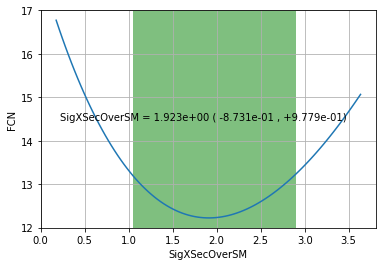

In [14]:
minimiser.draw_profile('SigXSecOverSM')

In [15]:
signal_1 = HistiSample('signal')
signal_1.SetHisto((np.hstack([hist_1,np.flip(hist_1,0)]),bins_3))
signal_1.AddNorm("SigXSecOverSM",1.0,0,3)
background_1 = HistiSample('background1')
background_1.SetHisto((np.hstack([hist_2,hist_2]),bins_3))
background_1.AddOverallSys("BackgroundNormSyst1",0.9,1.1)
background_2 = HistiSample('background1')
background_2.SetHisto((np.hstack([hist_3,hist_3]),bins_3))
background_2.AddOverallSys("BackgroundNormSyst2",0.7,1.3)

In [16]:
chan3 = HistiChannel("CR2")
chan3.AddSample(signal_1)
chan3.AddSample(background_1)
chan3.AddSample(background_2)

In [17]:
data3 = np.hstack([hist_1,np.flip(hist_1,0)])*2 + np.hstack([hist_2,hist_2]) + np.hstack([hist_3,hist_3])

chan3.SetData(data3)
m.AddChannel(chan3)

In [18]:
blh = BinnedLH(m)
params = m.Parameters()
minimiser = Minuit(blh, **params)
minimiser.migrad()

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter SigXSecOverSM is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter BackgroundNormSyst1 is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter BackgroundNormSyst2 is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter BackgroundNormSyst3 is floating but does not have initial step size. Assume 1.
  This is se

FCN = 30.1213944414 
 TOTAL NCALL = 67 
 NCALLS = 67 
 
 
 EDM = 2.77343223326e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,1.98851,0.552672,0,0,0.0,3.0,
2,BackgroundNormSyst1,-0.584033,2.62488,0,0,-5.0,5.0,
3,BackgroundNormSyst2,0.305449,1.22103,0,0,-5.0,5.0,
4,BackgroundNormSyst3,0.6,7.70479,0,0,-5.0,5.0,


({'hesse_failed': True, 'has_reached_call_limit': False, 'has_accurate_covar': False, 'has_posdef_covar': False, 'up': 1.0, 'edm': 2.7734322332593433e-05, 'is_valid': False, 'is_above_max_edm': False, 'has_covariance': True, 'has_made_posdef_covar': False, 'has_valid_parameters': True, 'fval': 30.121394441434127, 'nfcn': 67},
 [{'is_const': False, 'name': 'SigXSecOverSM', 'has_limits': True, 'value': 1.9885063379842502, 'number': 0, 'has_lower_limit': True, 'upper_limit': 3.0, 'lower_limit': 0.0, 'has_upper_limit': True, 'error': 0.5526715464358543, 'is_fixed': False},
  {'is_const': False, 'name': 'BackgroundNormSyst1', 'has_limits': True, 'value': -0.5840334552248807, 'number': 1, 'has_lower_limit': True, 'upper_limit': 5.0, 'lower_limit': -5.0, 'has_upper_limit': True, 'error': 2.624883830138921, 'is_fixed': False},
  {'is_const': False, 'name': 'BackgroundNormSyst2', 'has_limits': True, 'value': 0.30544907374000285, 'number': 2, 'has_lower_limit': True, 'upper_limit': 5.0, 'lower_l

(array([ 0.88316325,  0.90549341,  0.92782357,  0.95015374,  0.9724839 ,
         0.99481406,  1.01714423,  1.03947439,  1.06180455,  1.08413472,
         1.10646488,  1.12879504,  1.15112521,  1.17345537,  1.19578553,
         1.2181157 ,  1.24044586,  1.26277602,  1.28510619,  1.30743635,
         1.32976651,  1.35209668,  1.37442684,  1.39675701,  1.41908717,
         1.44141733,  1.4637475 ,  1.48607766,  1.50840782,  1.53073799,
         1.55306815,  1.57539831,  1.59772848,  1.62005864,  1.6423888 ,
         1.66471897,  1.68704913,  1.70937929,  1.73170946,  1.75403962,
         1.77636978,  1.79869995,  1.82103011,  1.84336028,  1.86569044,
         1.8880206 ,  1.91035077,  1.93268093,  1.95501109,  1.97734126,
         1.99967142,  2.02200158,  2.04433175,  2.06666191,  2.08899207,
         2.11132224,  2.1336524 ,  2.15598256,  2.17831273,  2.20064289,
         2.22297305,  2.24530322,  2.26763338,  2.28996355,  2.31229371,
         2.33462387,  2.35695404,  2.3792842 ,  2.4

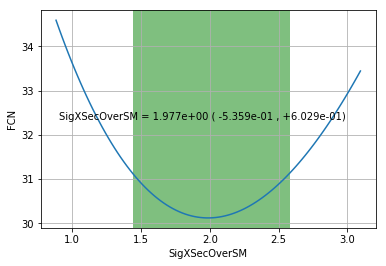

In [19]:
minimiser.draw_profile('SigXSecOverSM')